<a href="https://colab.research.google.com/github/iceman67/-Python/blob/master/pivot_table_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 데이터는 시계열(series)이나 표(table)의 형태로 나타낼 수 있다. **판다스 pandas** 패키지는 이러한 데이터를 다루기 위한 시리즈(Series) 클래스와 데이터프레임(DataFrame) 클래스를 제공함



* 판다스 패키지는 pd라는 별칭으로 임포트하는 것이 관례이므로 여기에서도 해당 관례를 따르도록 함

* 시리즈 Series 클래스는 넘파이에서 제공하는 1차원 배열과 비슷하지만 각 데이터의 의미를 표시하는 인덱스(index)를 붙일 수 있다. 데이터 자체는 값(value)라고 함
> 시리즈 = 값(value) + 인덱스(index)





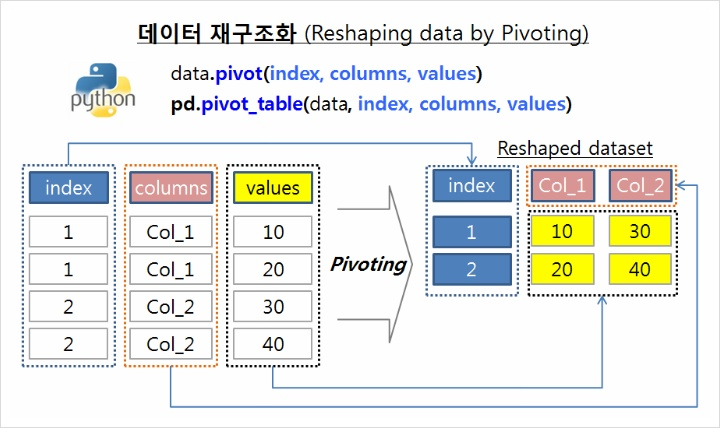

피봇테이블(pivot table)이란 데이터 열 중에서 두 개의 열을 각각 행 인덱스, 열 인덱스로 사용하여 데이터를 조회하여 펼쳐놓은 것
> 데이터 재구조화(reshaping data)를 위해 사용


pivot_table() 함수의 기본 구성요소

* 행 인덱스
* 열 인덱스
* 데이터 값
* 데이터 집계함수

In [ ]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]
df = pd.DataFrame(data, columns=columns)
df

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [ ]:
df.pivot("도시", "연도", "인구")

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [ ]:
df.set_index(["도시", "연도"])[["인구"]].unstack()

인구                      
연도       2005       2010       2015
도시                                 
부산  3512547.0  3393191.0  3448737.0
서울  9762546.0  9631482.0  9904312.0
인천        NaN   263203.0  2890451.0

In [ ]:
df1.pivot(["지역", "도시"], "연도", "인구")

연도           2005       2010       2015
지역  도시                                 
경상권 부산  3512547.0  3393191.0  3448737.0
수도권 서울  9762546.0  9631482.0  9904312.0
    인천        NaN   263203.0  2890451.0

* 공공개발데이터 활용-미세먼지

In [ ]:
 df = pd.read_csv('sample_data/fine_dust_data.csv')
 df.head()

,년,월,지역명,항목,경보단계,농도(㎍/㎥)
0,2019,1,전북,초미세먼지,주의보,91
1,2019,1,전북,미세먼지,주의보,150
2,2019,1,전북,초미세먼지,주의보,92
3,2019,1,전북,초미세먼지,주의보,99
4,2019,1,전북,초미세먼지,주의보,81


In [ ]:
value_by_year = pd.pivot_table(df, index = '년', values = '농도(㎍/㎥)') 
print(value_by_year) 

         농도(㎍/㎥)
년               
2019  113.130841
2020  127.863850


In [ ]:
value_by_year = pd.pivot_table(df, index = '년', values = '농도(㎍/㎥)', aggfunc='sum') 
print(value_by_year)

      농도(㎍/㎥)
년            
2019    60525
2020    27235


In [ ]:
value_by_region = pd.pivot_table(df, index = '지역명', values = '농도(㎍/㎥)') 
print(value_by_region)

        농도(㎍/㎥)
지역명            
강원   117.307692
경기   110.627907
경남   118.746479
경북   135.750000
광주   131.642857
대구   110.625000
대전   123.833333
부산    98.692308
서울   112.947368
세종   109.444444
울산   106.000000
인천   122.512821
전남   124.307692
전북   119.834483
제주   115.500000
충남   113.180000
충북   110.433962


In [ ]:
total_by_region = pd.pivot_table(df, index = '지역명', values = '농도(㎍/㎥)', aggfunc='sum')
total_by_region

,농도(㎍/㎥)
지역명,
강원,3050
경기,9514
경남,8431
경북,2172
광주,1843
대구,885
대전,2229
부산,1283
서울,2146


In [ ]:
#total_by_region.plot(kind='bar')


In [ ]:
total_by_region[total_by_region[ '농도(㎍/㎥)'] > 5000]

,농도(㎍/㎥)
지역명,
경기,9514
경남,8431
전북,34752
충남,5659
충북,5853


In [ ]:
multi_index = pd.pivot_table(df, index = ['지역명', '경보단계'], values = '농도(㎍/㎥)', aggfunc = ['sum', 'mean'])
multi_index

sum        mean
         농도(㎍/㎥)     농도(㎍/㎥)
지역명 경보단계                    
강원  경보       153  153.000000
    주의보     2897  115.880000
경기  경보       628  157.000000
    주의보     8886  108.365854
경남  주의보     8431  118.746479
경북  주의보     2172  135.750000
광주  경보       154  154.000000
    주의보     1689  129.923077
대구  주의보      885  110.625000
대전  경보       310  155.000000
    주의보     1919  119.937500
부산  주의보     1283   98.692308
서울  경보       160  160.000000
    주의보     1986  110.333333
세종  경보       320  160.000000
    주의보     1650  103.125000
울산  주의보      424  106.000000
인천  주의보     4778  122.512821
전남  경보       159  159.000000
    주의보     1457  121.416667
전북  경보      2387  183.615385
    주의보    32365  116.841155
제주  주의보     1155  115.500000
충남  경보       468  156.000000
    주의보     5191  110.446809
충북  경보       508  169.333333
    주의보     5345  106.900000

In [ ]:
df = pd.read_excel('https://github.com/datagy/pivot_table_pandas/raw/master/sample_pivot.xlsx', parse_dates=['Date']) 
print(df.head())


        Date Region                 Type  Units  Sales
0 2020-07-11   East  Children's Clothing   18.0    306
1 2020-09-23  North  Children's Clothing   14.0    448
2 2020-04-02  South     Women's Clothing   17.0    425
3 2020-02-28   East  Children's Clothing   26.0    832
4 2020-03-19   West     Women's Clothing    3.0     33


 * 지역 Rgion 으로 Sales 를 자료를 통합(aggregating) 함, 평균(mean) 으로 자료를 표현함

In [ ]:
sales_by_region = pd.pivot_table(df, index = 'Region', values = 'Sales') 
print(sales_by_region)

             Sales
Region            
East    408.182482
North   438.924051
South   432.956204
West    452.029412


In [ ]:
total_by_region = pd.pivot_table(df, index = 'Region', values = 'Sales', aggfunc='sum')
print(total_by_region)

         Sales
Region        
East    167763
North   138700
South    59315
West     61476


다중 인텍스 구성

In [ ]:
sales_by_region.reset_index()

,Region,Sales
0,East,408.182482
1,North,438.924051
2,South,432.956204
3,West,452.029412


In [ ]:
avg_region_price = pd.pivot_table(df, index = 'Region', values = 'Sales')
avg_region_price

,Sales
Region,
East,408.182482
North,438.924051
South,432.956204
West,452.029412


In [ ]:
avg_region_price[avg_region_price['Sales'] > 450]

,Sales
Region,
West,452.029412


In [ ]:
# show only sales greater than 450 or less than 430
avg_region_price[(avg_region_price['Sales'] > 450) | (avg_region_price['Sales'] < 430)]

,Sales
Region,
East,408.182482
West,452.029412


* 다중 인텍스 Pivot Table 생성 


In [ ]:
multi_index = pd.pivot_table(df, index = ['Region', 'Type'], values = 'Sales', aggfunc = 'sum')
print(multi_index)

                            Sales
Region Type                      
East   Children's Clothing  45849
       Men's Clothing       51685
       Women's Clothing     70229
North  Children's Clothing  37306
       Men's Clothing       39975
       Women's Clothing     61419
South  Children's Clothing  18570
       Men's Clothing       18542
       Women's Clothing     22203
West   Children's Clothing  20182
       Men's Clothing       19077
       Women's Clothing     22217


In [ ]:
multi_functions = pd.pivot_table(df, index = ['Region', 'Type'], values = 'Sales', aggfunc = ['sum', len]) 
print(multi_functions)

                              sum   len
                            Sales Sales
Region Type                            
East   Children's Clothing  45849   113
       Men's Clothing       51685   122
       Women's Clothing     70229   176
North  Children's Clothing  37306    85
       Men's Clothing       39975    89
       Women's Clothing     61419   142
South  Children's Clothing  18570    45
       Men's Clothing       18542    39
       Women's Clothing     22203    53
West   Children's Clothing  20182    42
       Men's Clothing       19077    41
       Women's Clothing     22217    53


In [ ]:
columns_example = pd.pivot_table(df, index = 'Type', columns = 'Region', values = 'Units', aggfunc = 'sum') 
print(columns_example)

Region                 East   North   South    West
Type                                               
Children's Clothing  2318.0  1763.0  1017.0   789.0
Men's Clothing       2420.0     0.0   725.0   829.0
Women's Clothing     3372.0  2596.0  1056.0  1006.0


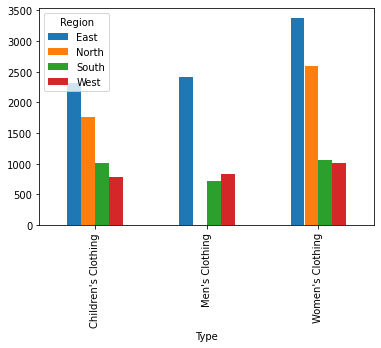

In [ ]:
columns_example.plot(kind='bar')


In [ ]:
df2 = pd.DataFrame({
    'key1': ['A', 'A', 'B', 'B', 'A'],
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]
})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [ ]:
groups = df2.groupby(df2.key1)
groups

In [ ]:
groups.groups


{'A': [0, 1, 4], 'B': [2, 3]}

In [ ]:
groups.sum()


,data1,data2
key1,,
A,8,80
B,7,70




---

[Titanic 데이터셋](https://www.kaggle.com/littleflower3/titanic-notebook)

* Survived: indicator variable indicating passenger's survival (1=yes, 0=no)

In [ ]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')[['age','sex','class','fare','survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [ ]:
pdf1 = pd.pivot_table(df,                # 피벗할 데이터프레임
                     index = 'class',    # 행 위치에 들어갈 열
                     columns = 'sex',    # 열 위치에 들어갈 열
                     values = 'age',     # 데이터로 사용할 열
                     aggfunc = 'mean')   # 데이터 집계함수
pdf1

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


행에는 class열의 3가지 그룹, 열에는 sex열의 2가지그룹, 값에는 age열을 평균값(mean)으로 집계한 값임

In [ ]:
pdf2 = pd.pivot_table(df,                # 피벗할 데이터프레임
                     index = 'class',    # 행 위치에 들어갈 열
                     columns = 'sex',    # 열 위치에 들어갈 열
                     values = 'survived',     # 데이터로 사용할 열
                     aggfunc = ['mean', 'sum'])   # 데이터 집계함수
pdf2

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

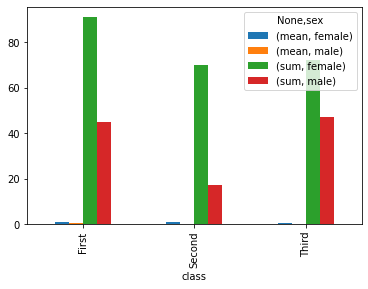

In [ ]:
pdf2.plot(kind='bar')


타이타닉 데이터를 읽은 후  class, age열에 대해 그룹객체를 생성한 후, 평균(mean)으로 집계함

In [ ]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')[['age','sex','class','fare','survived']]
grouped = df.groupby(['class','sex'])
gdf = grouped.mean()
gdf

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

class열의 First 행만 인덱싱

In [ ]:
gdf.loc['First']

,age,fare,survived
sex,,,
female,34.611765,106.125798,0.968085
male,41.281386,67.226127,0.368852


In [ ]:
gdf.loc[('First','female')]

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64

In [ ]:
gdf.xs('male', level='sex')

,age,fare,survived
class,,,
First,41.281386,67.226127,0.368852
Second,30.740707,19.741782,0.157407
Third,26.507589,12.661633,0.135447


In [ ]:
print(gdf.reset_index())


    class     sex        age        fare  survived
0   First  female  34.611765  106.125798  0.968085
1   First    male  41.281386   67.226127  0.368852
2  Second  female  28.722973   21.970121  0.921053
3  Second    male  30.740707   19.741782  0.157407
4   Third  female  21.750000   16.118810  0.500000
5   Third    male  26.507589   12.661633  0.135447


In [ ]:
gdf2 = df.groupby('class').agg(['mean','max'])[['age','fare']]
gdf2

age             fare          
             mean   max       mean       max
class                                       
First   38.233441  80.0  84.154687  512.3292
Second  29.877630  70.0  20.662183   73.5000
Third   25.140620  74.0  13.675550   69.5500

In [ ]:
gdf2.columns = ['age_mean', 'age_max', 'fare_mean','fare_max']
print(gdf2.head())

         age_mean  age_max  fare_mean  fare_max
class                                          
First   38.233441     80.0  84.154687  512.3292
Second  29.877630     70.0  20.662183   73.5000
Third   25.140620     74.0  13.675550   69.5500


In [ ]:
pdf3 = pd.pivot_table(df,
                     index = ['class','sex'],
                     columns = 'survived',
                     values = ['age','fare'],
                     aggfunc = ['mean','max'])
pdf3

mean                         ...   max                  
                     age                   fare  ...   age    fare          
survived               0          1           0  ...     1       0         1
class  sex                                       ...                        
First  female  25.666667  34.939024  110.604167  ...  63.0  151.55  512.3292
       male    44.581967  36.248000   62.894910  ...  80.0  263.00  512.3292
Second female  36.000000  28.080882   18.250000  ...  55.0   26.00   65.0000
       male    33.369048  16.022000   19.488965  ...  62.0   73.50   39.0000
Third  female  23.818182  19.329787   19.773093  ...  63.0   69.55   31.3875
       male    27.255814  22.274211   12.204469  ...  45.0   69.55   56.4958

[6 rows x 8 columns]

In [ ]:
pdf3.xs('First')

mean                         ...   max                  
                age                   fare  ...   age    fare          
survived          0          1           0  ...     1       0         1
sex                                         ...                        
female    25.666667  34.939024  110.604167  ...  63.0  151.55  512.3292
male      44.581967  36.248000   62.894910  ...  80.0  263.00  512.3292

[2 rows x 8 columns]

In [ ]:
pdf3.xs('male', level='sex')


mean                        ...   max                  
                age                  fare  ...   age    fare          
survived          0          1          0  ...     1       0         1
class                                      ...                        
First     44.581967  36.248000  62.894910  ...  80.0  263.00  512.3292
Second    33.369048  16.022000  19.488965  ...  62.0   73.50   39.0000
Third     27.255814  22.274211  12.204469  ...  45.0   69.55   56.4958

[3 rows x 8 columns]

In [ ]:
pdf3.xs(('Second','male'),level=[0,'sex'])


mean                               max                  
                   age               fare            age        fare      
survived             0       1          0        1     0     1     0     1
class  sex                                                                
Second male  33.369048  16.022  19.488965  21.0951  70.0  62.0  73.5  39.0

In [ ]:
pdf3.xs(('First','female'))

            survived
mean  age   0            25.666667
            1            34.939024
      fare  0           110.604167
            1           105.978159
max   age   0            50.000000
            1            63.000000
      fare  0           151.550000
            1           512.329200
Name: (First, female), dtype: float64

In [ ]:
pdf3.xs(('First','female'), level=['class','sex'])


mean                         ...   max                  
                    age                   fare  ...   age    fare          
survived              0          1           0  ...     1       0         1
class sex                                       ...                        
First female  25.666667  34.939024  110.604167  ...  63.0  151.55  512.3292

[1 rows x 8 columns]

In [ ]:
pdf3.xs('mean', axis=1)


age                   fare            
survived               0          1           0           1
class  sex                                                 
First  female  25.666667  34.939024  110.604167  105.978159
       male    44.581967  36.248000   62.894910   74.637320
Second female  36.000000  28.080882   18.250000   22.288989
       male    33.369048  16.022000   19.488965   21.095100
Third  female  23.818182  19.329787   19.773093   12.464526
       male    27.255814  22.274211   12.204469   15.579696

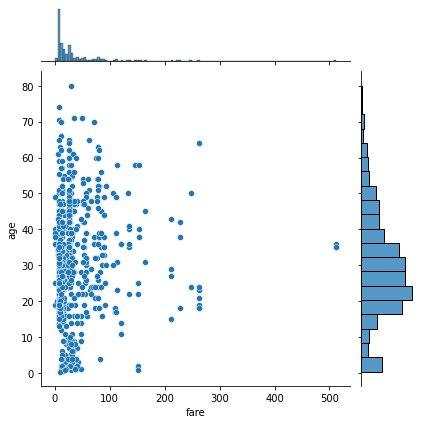

In [ ]:
sns.jointplot(x='fare',y='age',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


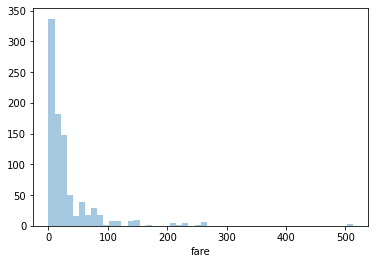

In [ ]:
sns.distplot(df["fare"],kde=False) #without the kde